In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

data = pd.read_csv('https://raw.githubusercontent.com/myungjun-kim-beep/econ2005/master/team-project/2020-1%EC%A1%B0-Stock%20market%20and%20Housing%20market/Raw_data.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        246 non-null    object 
 1   KOSPI        246 non-null    float64
 2   Price_Seoul  246 non-null    float64
 3   Homeloan     151 non-null    float64
 4   Call_rate    246 non-null    float64
 5   M2           246 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.7+ KB


In [60]:
data = data.set_index('Month')
data.head()

,KOSPI,Price_Seoul,Homeloan,Call_rate,M2
Month,,,,,
Jan-00,952.53,39.45,NaN,4.78,677.0
Feb-00,976.05,39.78,NaN,5.02,678.4
Mar-00,915.94,40.11,NaN,5.10,684.7
Apr-00,870.17,40.24,NaN,5.10,688.9
May-00,770.24,40.24,NaN,5.12,686.8


In [61]:
data.describe()

,KOSPI,Price_Seoul,Homeloan,Call_rate,M2
count,246.000000,246.000000,151.000000,246.000000,246.000000
mean,1572.281260,75.300894,143740.114570,3.013008,1619.241057
std,567.487951,16.886720,27712.859613,1.318823,680.757626
min,547.870000,39.450000,106294.400000,0.480000,677.000000
25%,957.677500,60.505000,124694.250000,1.762500,968.250000
50%,1802.985000,81.335000,128903.200000,3.015000,1614.550000
75%,2003.140000,84.730000,169437.250000,4.142500,2162.050000
max,2533.510000,104.640000,202582.300000,5.370000,3077.300000


In [62]:
data_no_missing = data.dropna()
data_no_missing

,KOSPI,Price_Seoul,Homeloan,Call_rate,M2
Month,,,,,
07-Dec,1903.99,78.64,107469.2,4.99,1269.5
08-Jan,1732.29,79.19,107433.5,4.99,1286.4
08-Feb,1689.53,79.72,106294.4,4.97,1309.2
08-Mar,1651.15,80.87,106393.8,4.97,1324.0
08-Apr,1776.58,82.20,107235.2,4.99,1339.4
...,...,...,...,...,...
20-Feb,2167.12,103.42,196654.8,1.24,2954.6
20-Mar,1786.75,103.91,198287.6,0.98,2984.3
20-Apr,1849.59,104.07,200025.0,0.74,3015.8


In [63]:
data_no_missing.columns

Index(['KOSPI', 'Price_Seoul', 'Homeloan', 'Call_rate', 'M2'], dtype='object')

In [64]:
data_no_missing.sort_values(by = "Price_Seoul",ascending = False)

,KOSPI,Price_Seoul,Homeloan,Call_rate,M2
Month,,,,,
20-Jun,2134.70,104.64,202582.3,0.48,3077.3
20-May,1965.17,104.09,201328.2,0.70,3046.1
20-Apr,1849.59,104.07,200025.0,0.74,3015.8
20-Mar,1786.75,103.91,198287.6,0.98,2984.3
20-Feb,2167.12,103.42,196654.8,1.24,2954.6
...,...,...,...,...,...
13-Aug,1896.96,80.53,125667.6,2.50,1888.7
13-Sep,1984.39,80.52,125556.5,2.50,1903.2
08-Feb,1689.53,79.72,106294.4,4.97,1309.2


In [65]:
data.corr()

,KOSPI,Price_Seoul,Homeloan,Call_rate,M2
KOSPI,1.000000,0.894096,0.678259,-0.717924,0.883528
Price_Seoul,0.894096,1.000000,0.877398,-0.765089,0.902510
Homeloan,0.678259,0.877398,1.000000,-0.723967,0.982793
Call_rate,-0.717924,-0.765089,-0.723967,1.000000,-0.871795
M2,0.883528,0.902510,0.982793,-0.871795,1.000000


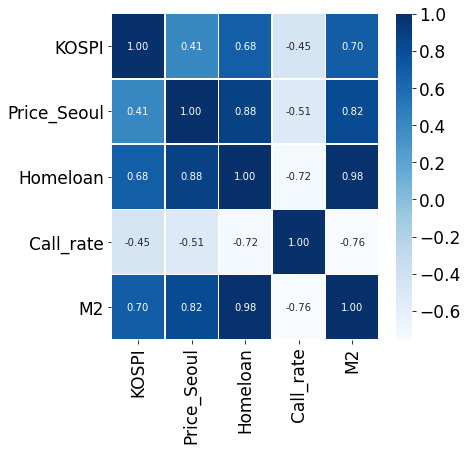

In [66]:
plt.figure(figsize=(6,6))
sns.heatmap(data = data_no_missing.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [67]:
import statsmodels.formula.api as smf

In [68]:
df_1 = data[["KOSPI","Price_Seoul"]]

In [69]:
df_1.head()

,KOSPI,Price_Seoul
Month,,
Jan-00,952.53,39.45
Feb-00,976.05,39.78
Mar-00,915.94,40.11
Apr-00,870.17,40.24
May-00,770.24,40.24


In [70]:
res_1 = smf.ols(formula='Price_Seoul ~ KOSPI', data=df_1).fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Seoul   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     972.4
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           4.35e-87
Time:                        15:49:21   Log-Likelihood:                -846.29
No. Observations:                 246   AIC:                             1697.
Df Residuals:                     244   BIC:                             1704.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4694      1.426     23.473      0.0

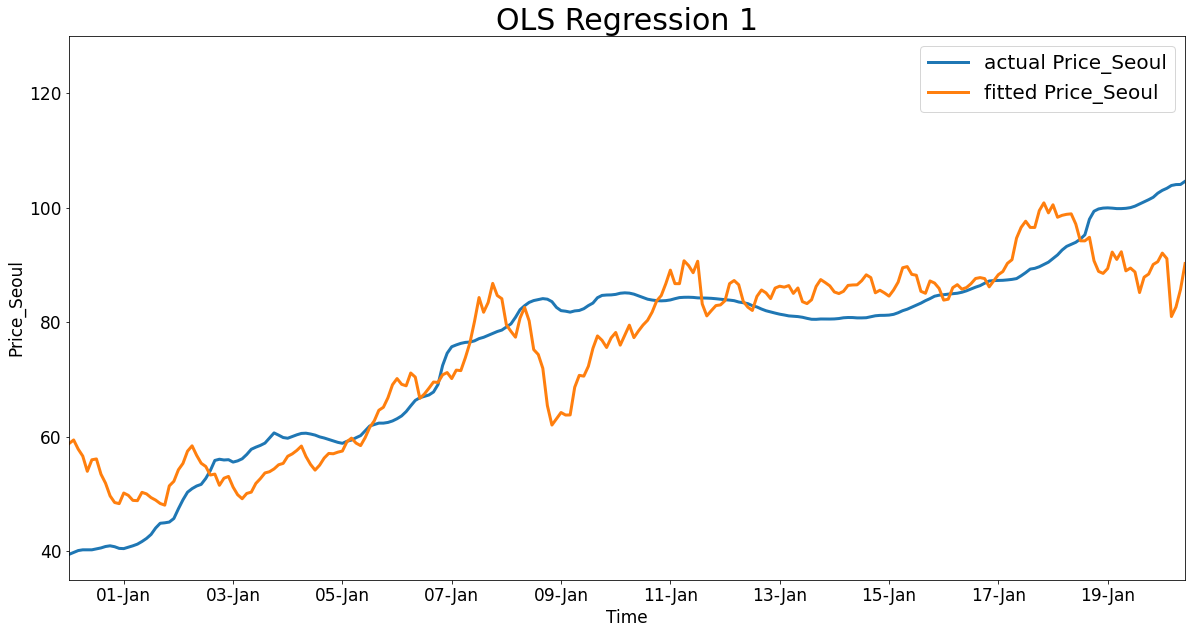

In [71]:
y_predict = res_1.params[0] + res_1.params[1]*df_1['KOSPI']
plt.figure(figsize=(20, 10))
plt.plot(df_1['Price_Seoul'], linewidth=3, label = 'actual Price_Seoul')
plt.plot(y_predict,linewidth=3,label = 'fitted Price_Seoul')
plt.xlim(0,245)
plt.ylim(35,130)
plt.xticks(["01-Jan","03-Jan","05-Jan","07-Jan","09-Jan","11-Jan","13-Jan","15-Jan","17-Jan","19-Jan"])

plt.xlabel('Time')
plt.ylabel('Price_Seoul')
plt.title('OLS Regression 1')
plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 17)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()

In [72]:
df_2 = data[["Price_Seoul","Call_rate"]]

In [73]:
df_2.head()

,Price_Seoul,Call_rate
Month,,
Jan-00,39.45,4.78
Feb-00,39.78,5.02
Mar-00,40.11,5.10
Apr-00,40.24,5.10
May-00,40.24,5.12


In [74]:
res_2 = smf.ols(formula='Price_Seoul ~ Call_rate', data=df_2).fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Seoul   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     344.5
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.51e-48
Time:                        15:49:24   Log-Likelihood:                -935.60
No. Observations:                 246   AIC:                             1875.
Df Residuals:                     244   BIC:                             1882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.8178      1.735     60.397      0.0

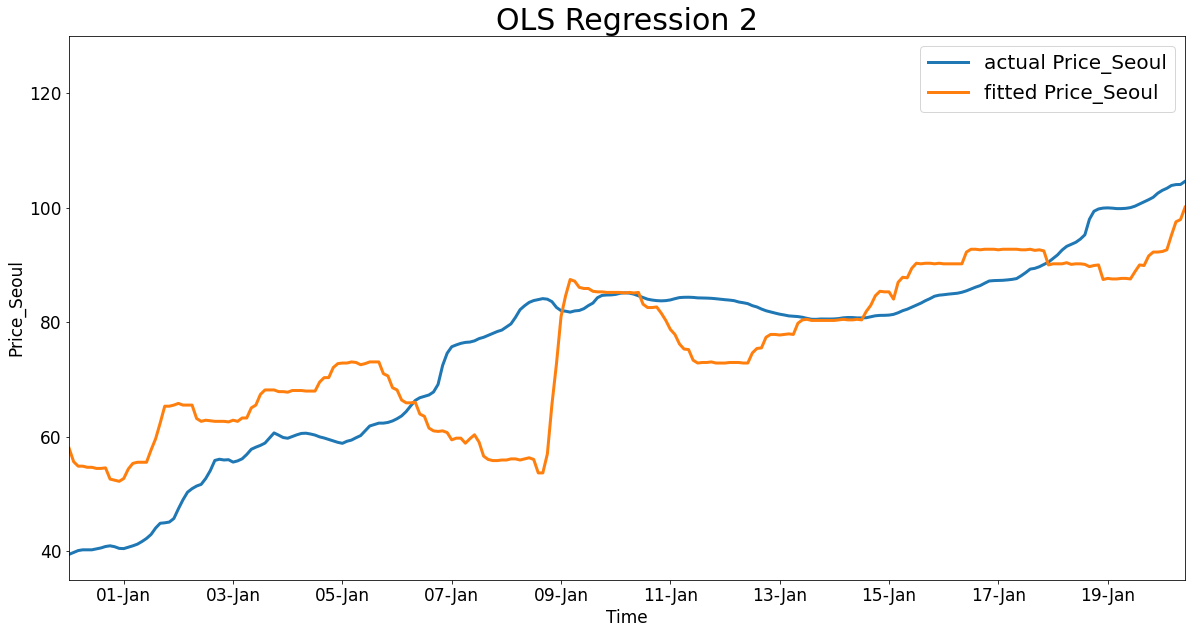

In [85]:
y_predict = res_2.params[0] + res_2.params[1]*df_2['Call_rate']
plt.figure(figsize=(20, 10))
plt.plot(df_2['Price_Seoul'], linewidth=3, label = 'actual Price_Seoul')
plt.plot(y_predict,linewidth=3,label = 'fitted Price_Seoul')
plt.xlim(0,245)
plt.ylim(35,130)
plt.xticks(["01-Jan","03-Jan","05-Jan","07-Jan","09-Jan","11-Jan","13-Jan","15-Jan","17-Jan","19-Jan"])
plt.xlabel('Time')
plt.ylabel('Price_Seoul')
plt.title('OLS Regression 2')

plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 17)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()

In [76]:
df_3 = data[["KOSPI","Call_rate"]]

In [77]:
df_3.head()

,KOSPI,Call_rate
Month,,
Jan-00,952.53,4.78
Feb-00,976.05,5.02
Mar-00,915.94,5.10
Apr-00,870.17,5.10
May-00,770.24,5.12


In [84]:
res_3 = smf.ols(formula='KOSPI ~ Call_rate', data=df_3).fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  KOSPI   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     259.5
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           2.92e-40
Time:                        15:50:46   Log-Likelihood:                -1819.4
No. Observations:                 246   AIC:                             3643.
Df Residuals:                     244   BIC:                             3650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2503.0657     63.050     39.700      0.0

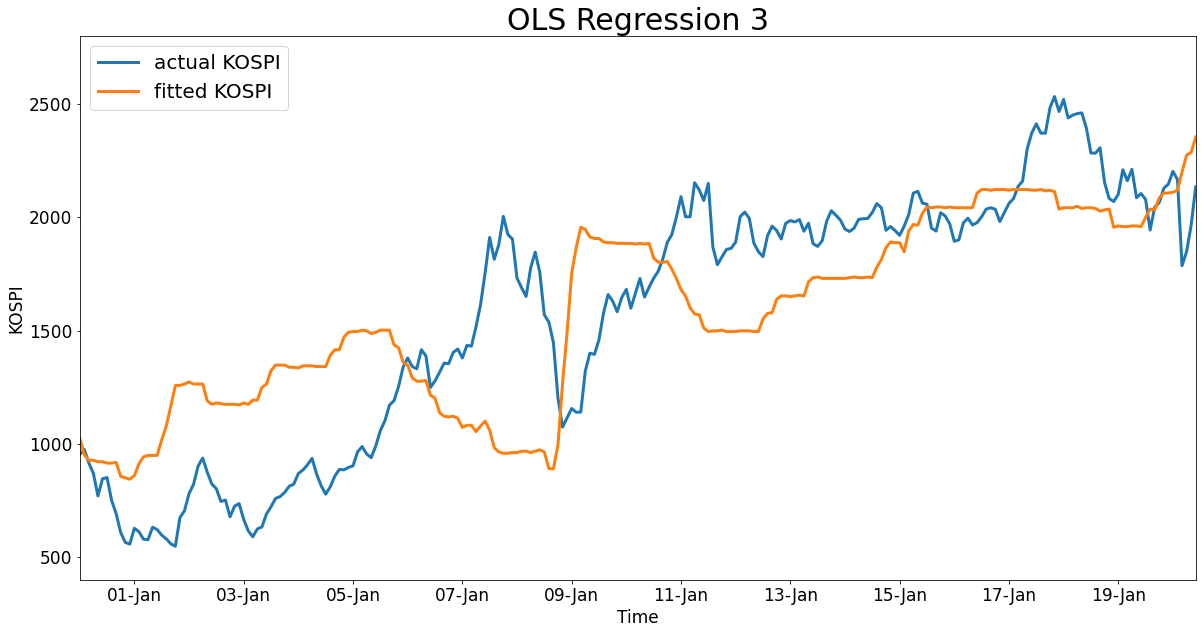

In [83]:
y_predict = res_3.params[0] + res_3.params[1]*df_3['Call_rate']
plt.figure(figsize=(20, 10))
plt.plot(df_3['KOSPI'], linewidth=3, label = 'actual KOSPI')
plt.plot(y_predict,linewidth=3,label = 'fitted KOSPI')
plt.xlim(0,245)
plt.ylim(400,2800)
plt.xticks(["01-Jan","03-Jan","05-Jan","07-Jan","09-Jan","11-Jan","13-Jan","15-Jan","17-Jan","19-Jan"])
plt.xlabel('Time')
plt.ylabel('KOSPI')
plt.title('OLS Regression 3')

plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 17)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()

In [86]:
df_4 = data[["Price_Seoul","M2"]]

In [87]:
df_4.head()

,Price_Seoul,M2
Month,,
Jan-00,39.45,677.0
Feb-00,39.78,678.4
Mar-00,40.11,684.7
Apr-00,40.24,688.9
May-00,40.24,686.8


In [88]:
res_4 = smf.ols(formula='Price_Seoul ~ M2', data=df_4).fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Seoul   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1072.
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           3.04e-91
Time:                        15:55:29   Log-Likelihood:                -836.65
No. Observations:                 246   AIC:                             1677.
Df Residuals:                     244   BIC:                             1684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.0502      1.201     32.516      0.0

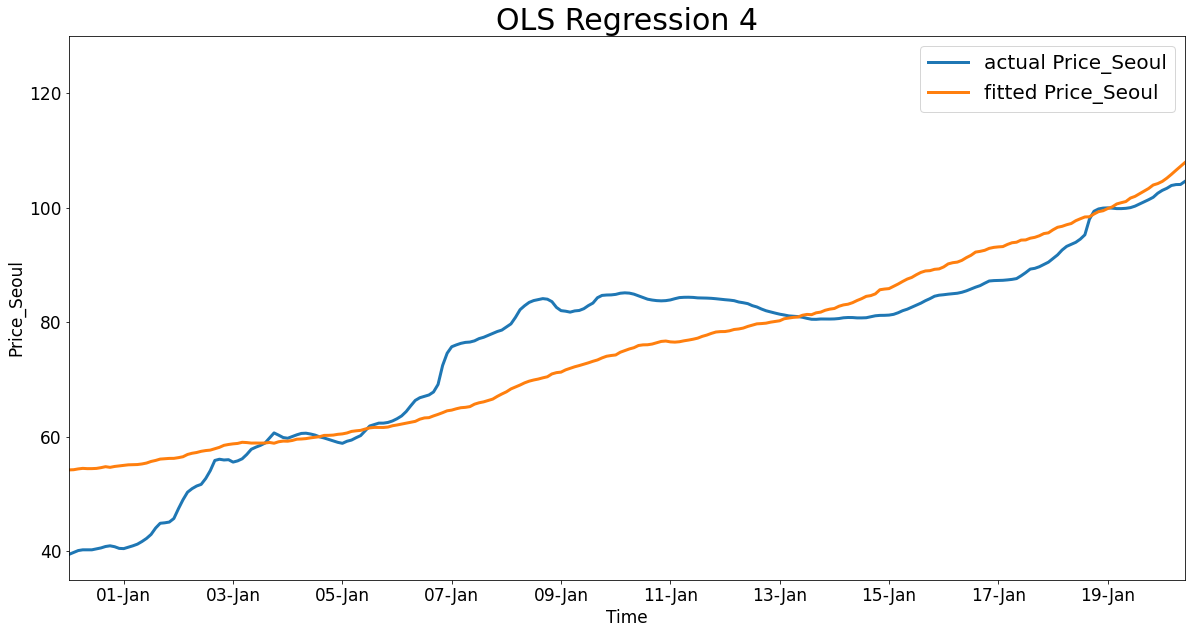

In [89]:
y_predict = res_4.params[0] + res_4.params[1]*df_4['M2']
plt.figure(figsize=(20, 10))
plt.plot(df_4['Price_Seoul'], linewidth=3, label = 'actual Price_Seoul')
plt.plot(y_predict,linewidth=3,label = 'fitted Price_Seoul')
plt.xlim(0,245)
plt.ylim(35,130)
plt.xticks(["01-Jan","03-Jan","05-Jan","07-Jan","09-Jan","11-Jan","13-Jan","15-Jan","17-Jan","19-Jan"])
plt.xlabel('Time')
plt.ylabel('Price_Seoul')
plt.title('OLS Regression 4')

plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 17)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()

In [91]:
df_5 = data[["KOSPI","M2"]]

In [92]:
df_5.head()

,KOSPI,M2
Month,,
Jan-00,952.53,677.0
Feb-00,976.05,678.4
Mar-00,915.94,684.7
Apr-00,870.17,688.9
May-00,770.24,686.8


In [93]:
res_5 = smf.ols(formula='KOSPI ~ M2', data=df_5).fit()
print(res_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  KOSPI   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     868.2
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           2.44e-82
Time:                        15:58:44   Log-Likelihood:                -1721.9
No. Observations:                 246   AIC:                             3448.
Df Residuals:                     244   BIC:                             3455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    379.6788     43.892      8.650      0.0

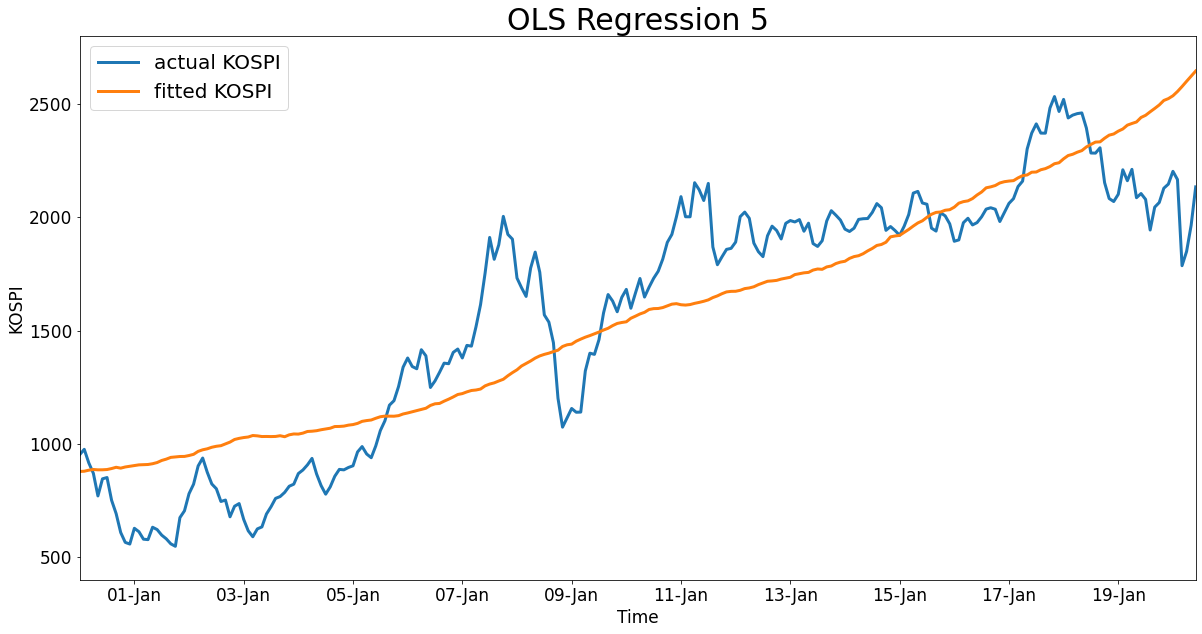

In [95]:
y_predict = res_5.params[0] + res_5.params[1]*df_5['M2']
plt.figure(figsize=(20, 10))
plt.plot(df_5['KOSPI'], linewidth=3, label = 'actual KOSPI')
plt.plot(y_predict,linewidth=3,label = 'fitted KOSPI')
plt.xlim(0,245)
plt.ylim(400,2800)
plt.xticks(["01-Jan","03-Jan","05-Jan","07-Jan","09-Jan","11-Jan","13-Jan","15-Jan","17-Jan","19-Jan"])
plt.xlabel('Time')
plt.ylabel('KOSPI')
plt.title('OLS Regression 5')

plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 17)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()

In [104]:
df_6 = data_no_missing[["Price_Seoul","Homeloan"]]

In [105]:
df_6.head()

,Price_Seoul,Homeloan
Month,,
07-Dec,78.64,107469.2
08-Jan,79.19,107433.5
08-Feb,79.72,106294.4
08-Mar,80.87,106393.8
08-Apr,82.20,107235.2


In [109]:
res_6 = smf.ols(formula='Price_Seoul ~ Homeloan', data=df_6).fit()
print(res_6.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Seoul   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     498.3
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           2.21e-49
Time:                        16:03:25   Log-Likelihood:                -392.81
No. Observations:                 151   AIC:                             789.6
Df Residuals:                     149   BIC:                             795.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.6309      1.416     39.280      0.0

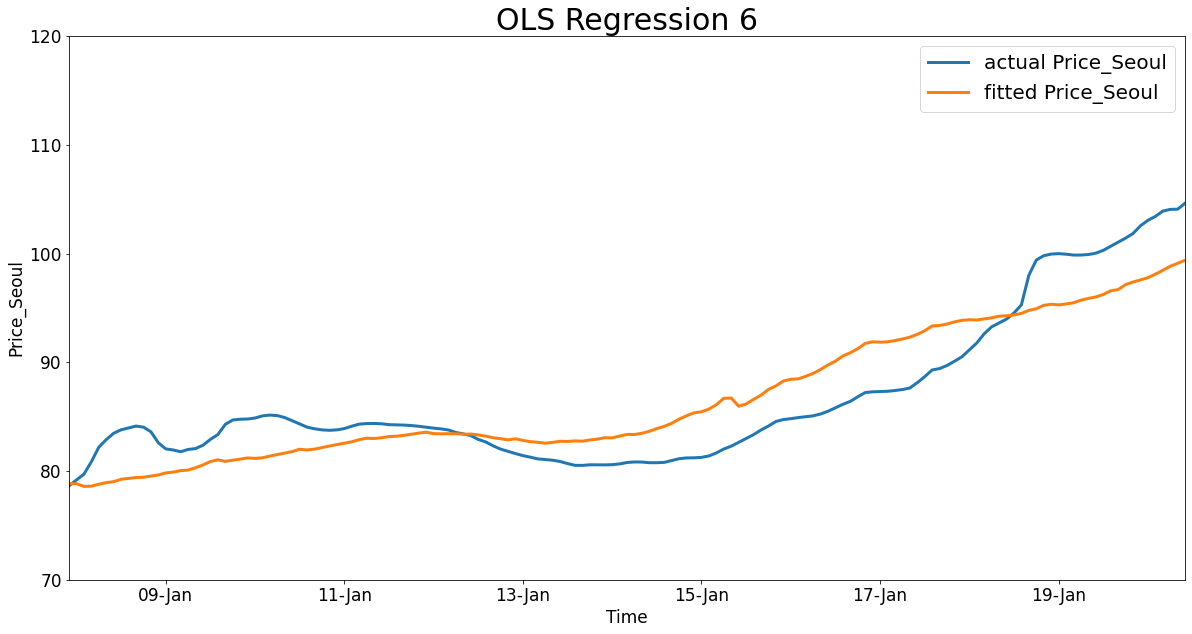

In [108]:
y_predict = res_6.params[0] + res_6.params[1]*df_6['Homeloan']
plt.figure(figsize=(20, 10))
plt.plot(df_6['Price_Seoul'], linewidth=3, label = 'actual Price_Seoul')
plt.plot(y_predict,linewidth=3,label = 'fitted Price_Seoul')
plt.xlim(0,150)
plt.ylim(70,120)
plt.xticks(["09-Jan","11-Jan","13-Jan","15-Jan","17-Jan","19-Jan"])
plt.xlabel('Time')
plt.ylabel('Price_Seoul')
plt.title('OLS Regression 6')

plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 17)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()

In [114]:
df_7 = data_no_missing[["KOSPI","Homeloan"]]

In [115]:
df_7.head()

,KOSPI,Homeloan
Month,,
07-Dec,1903.99,107469.2
08-Jan,1732.29,107433.5
08-Feb,1689.53,106294.4
08-Mar,1651.15,106393.8
08-Apr,1776.58,107235.2


In [116]:
res_7 = smf.ols(formula='KOSPI ~ Homeloan', data=df_7).fit()
print(res_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  KOSPI   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     126.9
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.10e-21
Time:                        16:04:32   Log-Likelihood:                -1019.8
No. Observations:                 151   AIC:                             2044.
Df Residuals:                     149   BIC:                             2050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    949.9432     90.046     10.550      0.0

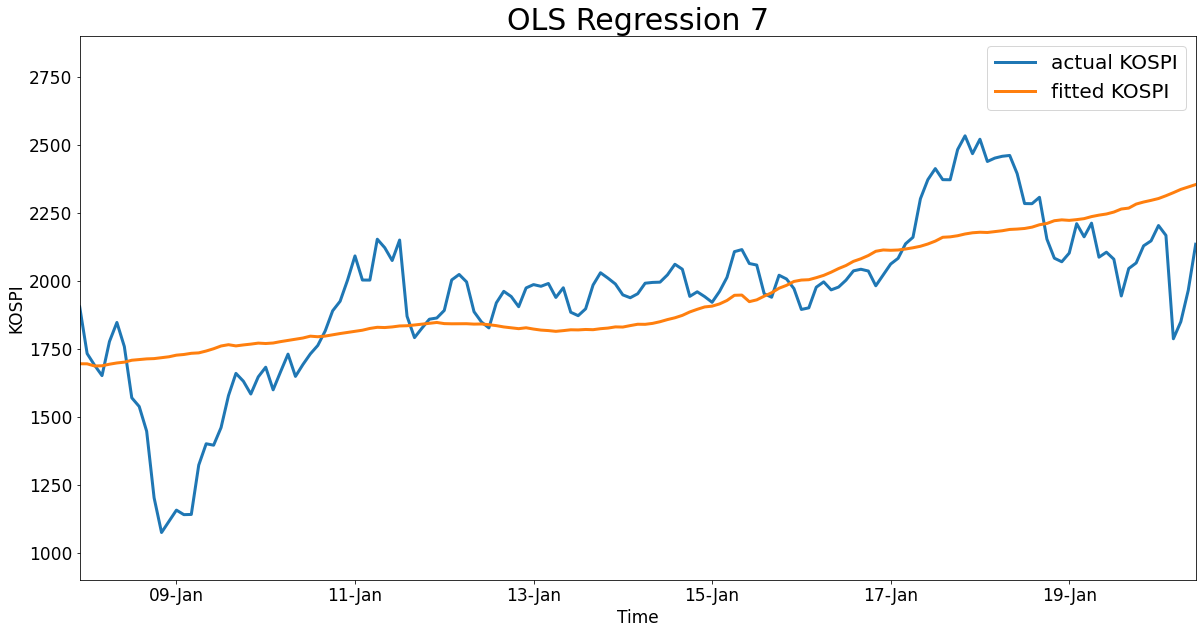

In [120]:
y_predict = res_7.params[0] + res_7.params[1]*df_7['Homeloan']
plt.figure(figsize=(20, 10))
plt.plot(df_7['KOSPI'], linewidth=3, label = 'actual KOSPI')
plt.plot(y_predict,linewidth=3,label = 'fitted KOSPI')
plt.xlim(0,150)
plt.ylim(900,2900)
plt.xticks(["09-Jan","11-Jan","13-Jan","15-Jan","17-Jan","19-Jan"])
plt.xlabel('Time')
plt.ylabel('KOSPI')
plt.title('OLS Regression 7')

plt.rc('axes',titlesize = 30)
plt.rc('axes',labelsize = 17)
plt.rc('xtick',labelsize = 17)
plt.rc('ytick',labelsize = 17)
plt.rc('legend',fontsize = 20)
plt.legend()
plt.show()